# Case Study: How can a company use wellness technology to make smart decisions?

## Scenery

You are a junior data analyst working on the marketing analyst team at Bellabeat, a manufacturer of high-tech products focused on women's health. Bellabeat is a successful small company, but it has the potential to become a larger player in the


global smart device market. Urška Sršen, co-founder and creative director of Bellabeat, believes that analyzing physical activity data from smart devices could unlock new business opportunities for the company. You've been asked to focus on one of Bellabeat's products and analyze smart device data to understand how consumers use their smart devices. The findings you discover will help guide the company's marketing strategy. You will present your analysis to Bellabeat's executive team along with your high-level recommendations for Bellabeat's marketing strategy.

## Characters and Products

* **Characters**
    * Urška Sršen: Co-founder and creative director of Bellabeat
    * Sando Mur: Mathematician and co-founder of Bellabeat, key member of the Bellabeat executive team.
    * Bellabeat Marketing Data Computational Analysis Team: A team of data analysts responsible for collecting, analyzing and reporting data that helps drive Bellabeat's marketing strategy. You joined this team six months ago and have dedicated yourself to understanding Bellabeat's mission and business goals, and seeing how you can help the company achieve these goals as a junior data analyst.
* **Products**
     * Bellabeat App: The Bellabeat app provides users with health data related to their physical activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
    * Leaf: Bellabeat classic wellness tracking device that can be worn as a bracelet, necklace or clip. The Leaf device connects to the Bellabeat app to track physical activity, sleep, and stress.
    * Time: This wellness watch combines the timeless look of a classic watch with smart technology to track the user's physical activity, sleep and stress. The Time watch connects to the Bellabeat app to provide daily wellness insights.
    * Spring: It is a water bottle that tracks daily water consumption using smart technology to ensure adequate hydration throughout the day. The Spring bottle connects to the Bellabeat app to track hydration levels.
    * Bellabeat Membership: Bellabeat also offers users a subscription-based membership program. Membership gives users 24/7 access to fully personalized nutrition, fitness, sleep, health and beauty, and mindfulness guidance based on the user's lifestyle and goals.

## About the company

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures smart products focused on healthcare. Sršen used her experience as an artist to develop beautifully designed technology that will inform and inspire women around the world. Collecting data on physical activity, sleep, stress and reproductive health has allowed Bellabeat to provide women with insights into their own health and habits. Since its founding in 2013, Bellabeat has grown at a rapid pace and quickly positioned itself as a technology-driven wellness company for women.

In 2016, Bellabeat had already opened offices around the world and launched multiple products. Bellabeat products became available online through a growing number of retailers in addition to Bellabeat's own e-commerce channel on its website. The company invested in traditional advertising media, such as radio, street signage, print media and television, but focuses mostly on digital marketing. Bellabeat invests year-round in Google Search, maintains active Facebook and Instagram pages, and constantly interacts with consumers on Twitter. In turn, Bellabeat runs video ads on YouTube and ads on the Google Display Network to support campaigns on key marketing dates.

Sršen knows that analysis of Bellabeat's available consumption data would reveal new growth opportunities. She asked the marketing data computational analytics team to focus on a Bellabeat product and analyze smart device usage data to learn how people are using their smart devices. Then, with this information, she would like to receive high-level recommendations on how these trends can contribute to Bellabeat's marketing strategy.

## Ask

Sršen asks you to analyze smart device usage data to understand how consumers use non-Bellabeat smart devices. Next, he wants you to select a Bellabeat product to apply this knowledge to your presentation. These questions will guide your analysis:



1. **What are some trends in the use of smart devices?**
2. **How could these trends be applied to Bellabeat customers?**
3. **How could these trends help influence Bellabeat's marketing strategy?**

You will create a report with the following deliverables:
1. **A clear summary of the business task**
2. **A description of all data sources used**
3. **Documentation of all data cleansing and manipulations**
4. **A summary of your analysis**
5. **Supporting visualizations and key findings**
6. **The three high-level content recommendations based on your analysis**

# Prepare

Sršen encourages you to use public data that explores the everyday habits of smart device users. She points you to a specific set of data:
* [Fitbit fitness tracking data](https://www.kaggle.com/datasets/arashnic/fitbit) CC0: Public domain, dataset available through [Mobius](https://www.kaggle.com/arashnic): This Kaggle dataset contains personal fitness tracking across thirty Fitbit users. Thirty eligible Fitbit users consented to sending personal tracking data including physical activity performance in minutes, heart rate, and sleep monitoring. It includes information about daily activity, steps and heart rate that can be used to explore users' habits.

Sršen tells you that this data set may have certain limitations, and she encourages you to consider adding other data that will help you resolve those limitations as you delve deeper into working with the data.

In [16]:
library(tidyverse)

In [17]:
csv_files <- list.files("data", pattern = ".csv", full.names = TRUE)
data_list <- list()

for (file in csv_files) {
  name <- tools::file_path_sans_ext(basename(file))
  data_list[[name]] <- read.csv(file)
}

### Data_list index


* 1 - dailyActivity_merged.csv

* 2 - dailyCalories_merged.csv

* 3 - **dailyIntensities_merged.csv**

* 4 - dailySteps_merged.csv

* 5 - heartrate_seconds_merged.csv

* 6 - hourlyCalories_merged.csv

* 7 - hourlyIntensities_merged.csv

* 8 - hourlySteps_merged.csv

* 9 - minuteCaloriesNarrow_merged.csv

* 10 - minuteCaloriesWide_merged.csv

* 11 - minuteIntensitiesNarrow_merged.csv

* 12 - minuteIntensitiesWide_merged.csv

* 13 - **nuteMETsNarrow_merged.csv**

* 14 - minuteSleep_merged.csv

* 15 - minuteStepsNarrow_merged.csv

* 16 - minuteStepsWide_merged.csv

* 17 - **sleepDay_merged.csv**

* 18 - **ightLogInfo_merged.csv**

In [18]:
str(data_list[3])

List of 1
 $ dailyIntensities_merged:'data.frame':	940 obs. of  10 variables:
  ..$ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
  ..$ ActivityDay             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
  ..$ SedentaryMinutes        : int [1:940] 728 776 1218 726 773 539 1149 775 818 838 ...
  ..$ LightlyActiveMinutes    : int [1:940] 328 217 181 209 221 164 233 264 205 211 ...
  ..$ FairlyActiveMinutes     : int [1:940] 13 19 11 34 10 20 16 31 12 8 ...
  ..$ VeryActiveMinutes       : int [1:940] 25 21 30 29 36 38 42 50 28 19 ...
  ..$ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
  ..$ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
  ..$ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...


In [19]:
str(data_list[13])

List of 1
 $ minuteMETsNarrow_merged:'data.frame':	1325580 obs. of  3 variables:
  ..$ Id            : num [1:1325580] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
  ..$ ActivityMinute: chr [1:1325580] "4/12/2016 12:00:00 AM" "4/12/2016 12:01:00 AM" "4/12/2016 12:02:00 AM" "4/12/2016 12:03:00 AM" ...
  ..$ METs          : int [1:1325580] 10 10 10 10 10 12 12 12 12 12 ...


In [20]:
str(data_list[17])

List of 1
 $ sleepDay_merged:'data.frame':	413 obs. of  5 variables:
  ..$ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
  ..$ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
  ..$ TotalSleepRecords : int [1:413] 1 2 1 2 1 1 1 1 1 1 ...
  ..$ TotalMinutesAsleep: int [1:413] 327 384 412 340 700 304 360 325 361 430 ...
  ..$ TotalTimeInBed    : int [1:413] 346 407 442 367 712 320 377 364 384 449 ...


In [21]:
str(data_list[18])

List of 1
 $ weightLogInfo_merged:'data.frame':	67 obs. of  8 variables:
  ..$ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
  ..$ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
  ..$ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
  ..$ WeightPounds  : num [1:67] 116 116 294 125 126 ...
  ..$ Fat           : int [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
  ..$ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
  ..$ IsManualReport: chr [1:67] "True" "True" "False" "True" ...
  ..$ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


In [22]:
daily_intesities <- data_list[[3]]
daily_MET <- data_list[[13]]
daily_sleep <- data_list[[17]]
daily_body_metrics <- data_list[[18]]

# Process

###  Data Cleaning

In [23]:
install.packages("janitor")
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(janitor)
library(skimr)
library(lubridate)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Trim data frames and rename columns

In [25]:
daily_intesities <- daily_intesities %>%
  select(Id, ActivityDay, SedentaryMinutes,  LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes) %>%
  rename(User = Id, Date = ActivityDay)

In [26]:
daily_MET <- daily_MET %>%
  rename(User = Id)

In [27]:
daily_sleep <- daily_sleep %>%
  rename(User = Id, Date = SleepDay)

In [28]:
daily_body_metrics <- daily_body_metrics %>%
  # We drop Fat metric, unfortunately it has a lot of NA values
  select(Id, Date, WeightKg, BMI,) %>%
  rename(User =Id)

### Clean Date columns and format

In [29]:
# Change variable to Date datatype
daily_intesities$Date <- as.POSIXct(daily_intesities$Date, format = "%m/%d/%Y")

daily_intesities$Date <- as.Date(daily_intesities$Date)

In [30]:
daily_MET$ActivityMinute <- as.POSIXct(daily_MET$ActivityMinute, format = "%m/%d/%Y %I:%M:%S %p")

# Extract date and time by separately, and create two new columns
daily_MET$Date <- as.Date(daily_MET$ActivityMinute)
daily_MET$time_met_record <- format(daily_MET$ActivityMinute, "%H:%M:%S")

# Drop original ActivityMinute column
daily_MET <- subset(daily_MET, select = -c(ActivityMinute))

In [31]:
# Change variable to Date datatype, and trim not useful time records
daily_sleep$Date <- as.POSIXct(daily_sleep$Date, format = "%m/%d/%Y %I:%M:%S %p")

daily_sleep$Date <- as.Date(daily_sleep$Date)

In [32]:
# Convert Date variable into POSIXct datatype
daily_body_metrics$Date <- as.POSIXct(daily_body_metrics$Date, format = "%m/%d/%Y %I:%M:%S %p")

# Then we extract only the date (not the time)
daily_body_metrics$Date <- as.Date(daily_body_metrics$Date)

### Search for NAs

In [33]:
daily_intesities <- na.omit(daily_intesities)

In [34]:
daily_MET <- na.omit(daily_MET)

In [35]:
daily_sleep <- na.omit(daily_sleep)

In [36]:
daily_body_metrics <- na.omit(daily_body_metrics)

### Search for outliers

#### daily_intensities

In [37]:
min(daily_intesities$Date)
max(daily_intesities$Date)

[1] "2016-04-12"

[1] "2016-05-12"

In [38]:
min(daily_intesities$SedentaryMinutes)
max(daily_intesities$SedentaryMinutes)

[1] 0

[1] 1440

In [39]:
min(daily_intesities$LightlyActiveMinutes)
max(daily_intesities$LightlyActiveMinutes)

[1] 0

[1] 518

In [40]:
min(daily_intesities$FairlyActiveMinutes)
max(daily_intesities$FairlyActiveMinutes)

[1] 0

[1] 143

In [41]:
min(daily_intesities$VeryActiveMinutes)
max(daily_intesities$VeryActiveMinutes)

[1] 0

[1] 210

#### daily_MET

In [42]:
min(daily_MET$time_met_record)
max(daily_MET$time_met_record)

[1] "00:00:00"

[1] "23:59:00"

In [43]:
min(daily_MET$METs)
max(daily_MET$METs)

[1] 0

[1] 157

#### daily_sleepp

In [44]:
min(daily_sleep$Date)
max(daily_sleep$Date)

[1] "2016-04-12"

[1] "2016-05-12"

In [45]:
min(daily_sleep$TotalSleepRecords)
max(daily_sleep$TotalSleepRecords)

[1] 1

[1] 3

In [46]:
min(daily_sleep$TotalMinutesAsleep)
max(daily_sleep$TotalMinutesAsleep)

[1] 58

[1] 796

In [47]:
min(daily_sleep$TotalTimeInBed)
max(daily_sleep$TotalTimeInBed)

[1] 61

[1] 961

#### daily_body_metrics

In [48]:
min(daily_body_metrics$Date)
max(daily_body_metrics$Date)

[1] "2016-04-12"

[1] "2016-05-12"

In [49]:
min(daily_body_metrics$WeightKg)
max(daily_body_metrics$WeightKg)

[1] 52.6

[1] 133.5

In [50]:
min(daily_body_metrics$BMI)
max(daily_body_metrics$BMI)

[1] 21.45

[1] 47.54

### Summary

In [51]:
str(daily_intesities)

'data.frame':	940 obs. of  6 variables:
 $ User                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                : Date, format: "2016-04-12" "2016-04-13" ...
 $ SedentaryMinutes    : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ LightlyActiveMinutes: int  328 217 181 209 221 164 233 264 205 211 ...
 $ FairlyActiveMinutes : int  13 19 11 34 10 20 16 31 12 8 ...
 $ VeryActiveMinutes   : int  25 21 30 29 36 38 42 50 28 19 ...


In [52]:
str(daily_MET)

'data.frame':	1325580 obs. of  4 variables:
 $ User           : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ METs           : int  10 10 10 10 10 12 12 12 12 12 ...
 $ Date           : Date, format: "2016-04-12" "2016-04-12" ...
 $ time_met_record: chr  "00:00:00" "00:01:00" "00:02:00" "00:03:00" ...


In [53]:
str(daily_sleep)

'data.frame':	413 obs. of  5 variables:
 $ User              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date              : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [54]:
str(daily_body_metrics)

'data.frame':	67 obs. of  4 variables:
 $ User    : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date    : Date, format: "2016-05-02" "2016-05-03" ...
 $ WeightKg: num  52.6 52.6 133.5 56.7 57.3 ...
 $ BMI     : num  22.6 22.6 47.5 21.5 21.7 ...


# Analize & Share

## daily_intensities

In [55]:
library(dplyr)
library(ggplot2)

# Custom vizz size
options(repr.plot.width=8, repr.plot.height=8)

# Create new variable for the day of the week
daily_intesities <- daily_intesities %>%
  mutate(DayOfWeek = weekdays(Date))

# Group by day of the week and calculate mean
summary_intensities_by_day <- daily_intesities %>%
  group_by(DayOfWeek) %>%
  summarize(avg_SedentaryMinutes = mean(SedentaryMinutes),
            avg_LightlyActiveMinutes = mean(LightlyActiveMinutes),
            avg_FairlyActiveMinutes = mean(FairlyActiveMinutes),
            avg_VeryActiveMinutes = mean(VeryActiveMinutes))

# Reorder DayOfWeek variable to give the vizz the order we want
summary_intensities_by_day$DayOfWeek <- factor(summary_intensities_by_day$DayOfWeek,
                                   levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

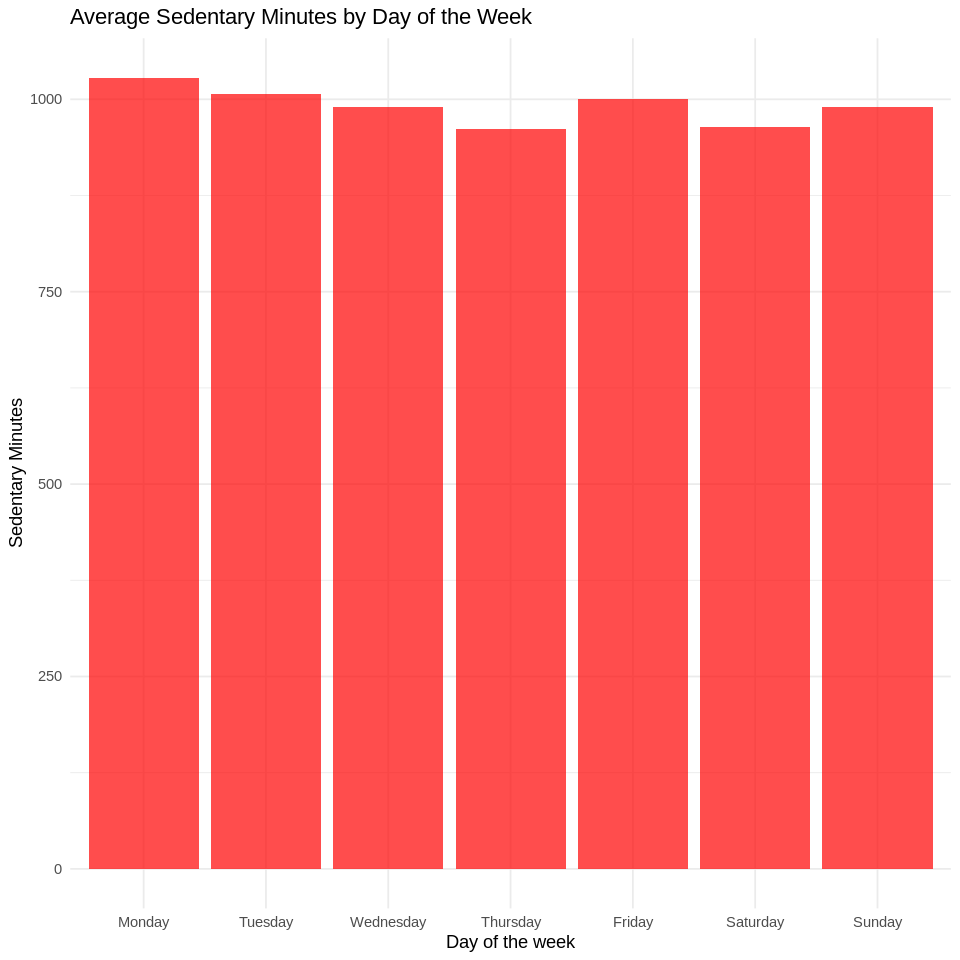

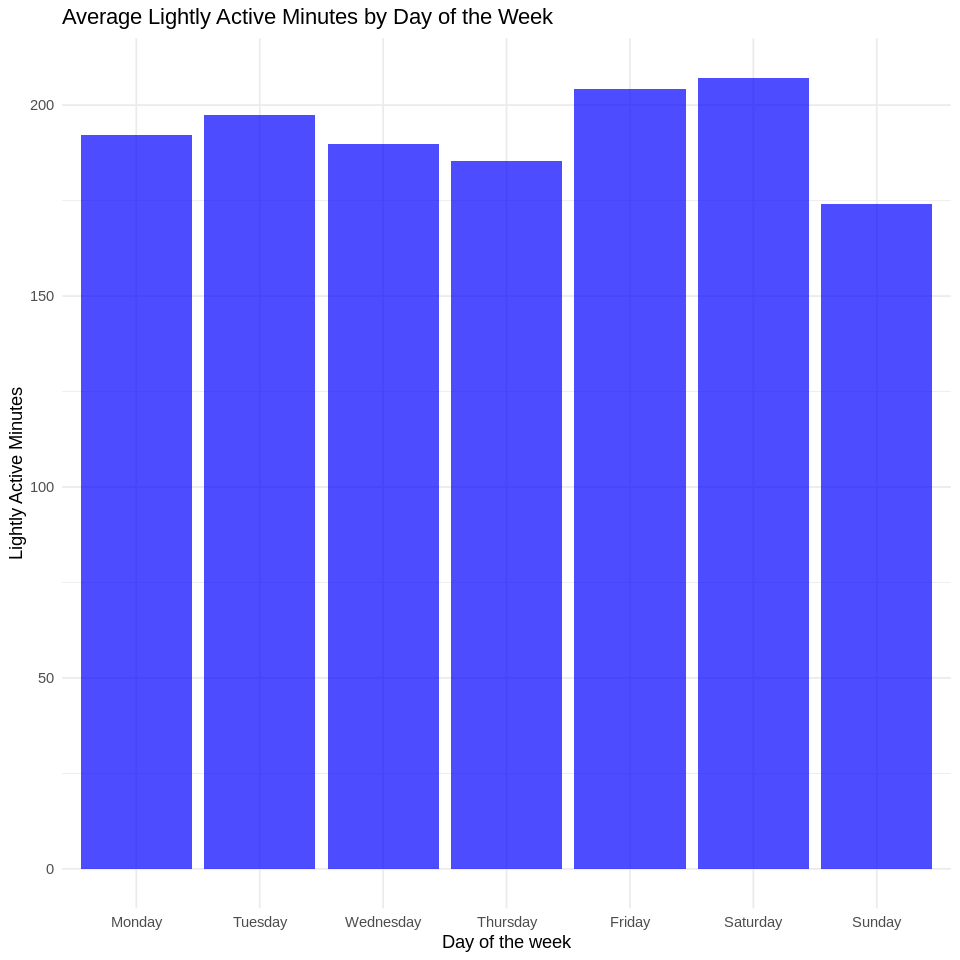

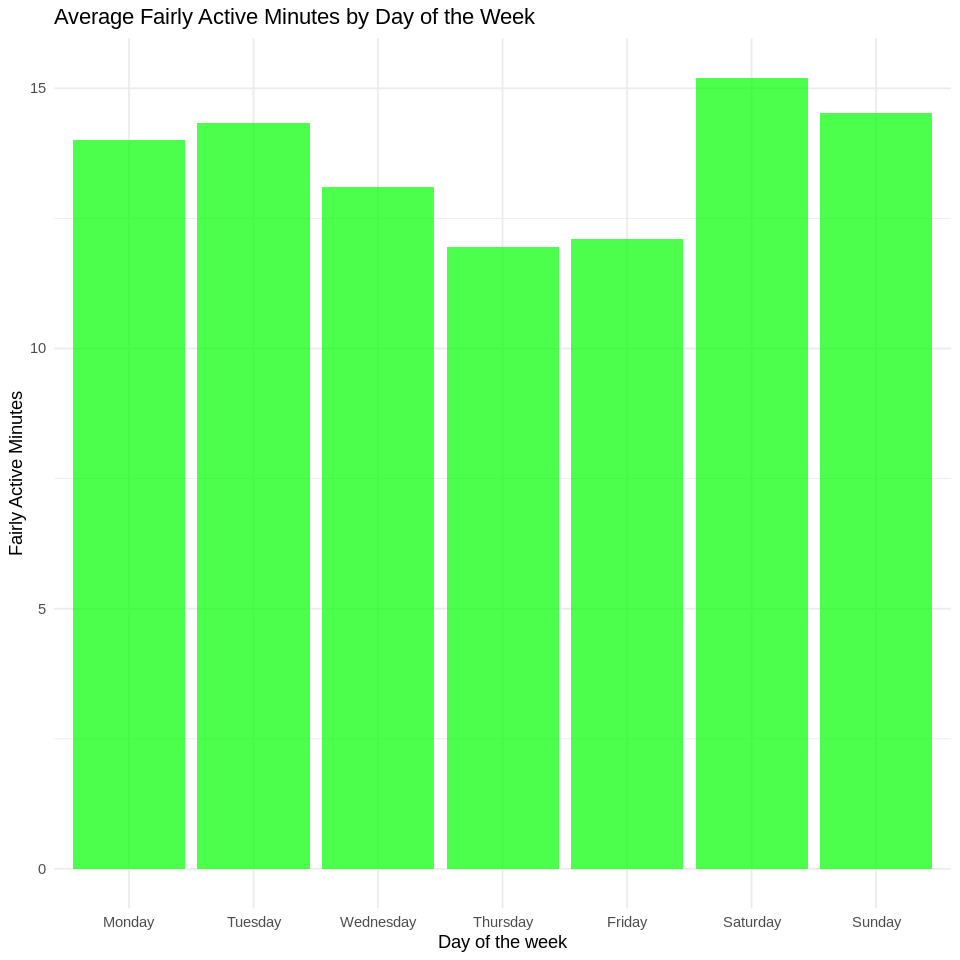

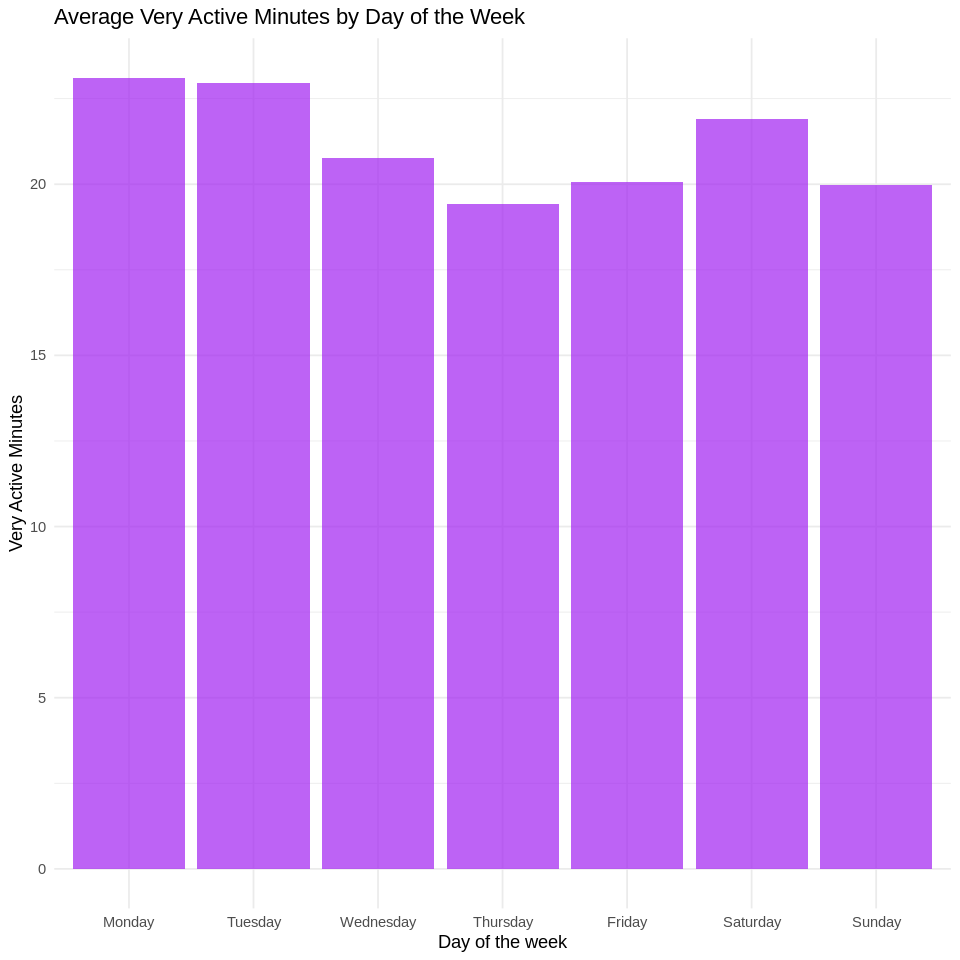

In [56]:
# Sedentary visualization
ggplot(summary_intensities_by_day, aes(x = DayOfWeek, y = avg_SedentaryMinutes)) +
  geom_bar(stat = "identity", fill = "red", alpha = 0.7) +
  labs(title = "Average Sedentary Minutes by Day of the Week",
       x = "Day of the week",
       y = "Sedentary Minutes") +
  theme_minimal()

# Lightly active visualization
ggplot(summary_intensities_by_day, aes(x = DayOfWeek, y = avg_LightlyActiveMinutes)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(title = "Average Lightly Active Minutes by Day of the Week",
       x = "Day of the week",
       y = "Lightly Active Minutes") +
  theme_minimal()

# Fairly active visualization
ggplot(summary_intensities_by_day, aes(x = DayOfWeek, y = avg_FairlyActiveMinutes)) +
  geom_bar(stat = "identity", fill = "green", alpha = 0.7) +
  labs(title = "Average Fairly Active Minutes by Day of the Week",
       x = "Day of the week",
       y = "Fairly Active Minutes") +
  theme_minimal()

# Very active visualization
ggplot(summary_intensities_by_day, aes(x = DayOfWeek, y = avg_VeryActiveMinutes)) +
  geom_bar(stat = "identity", fill = "purple", alpha = 0.7) +
  labs(title = "Average Very Active Minutes by Day of the Week",
       x = "Day of the week",
       y = "Very Active Minutes") +
  theme_minimal()

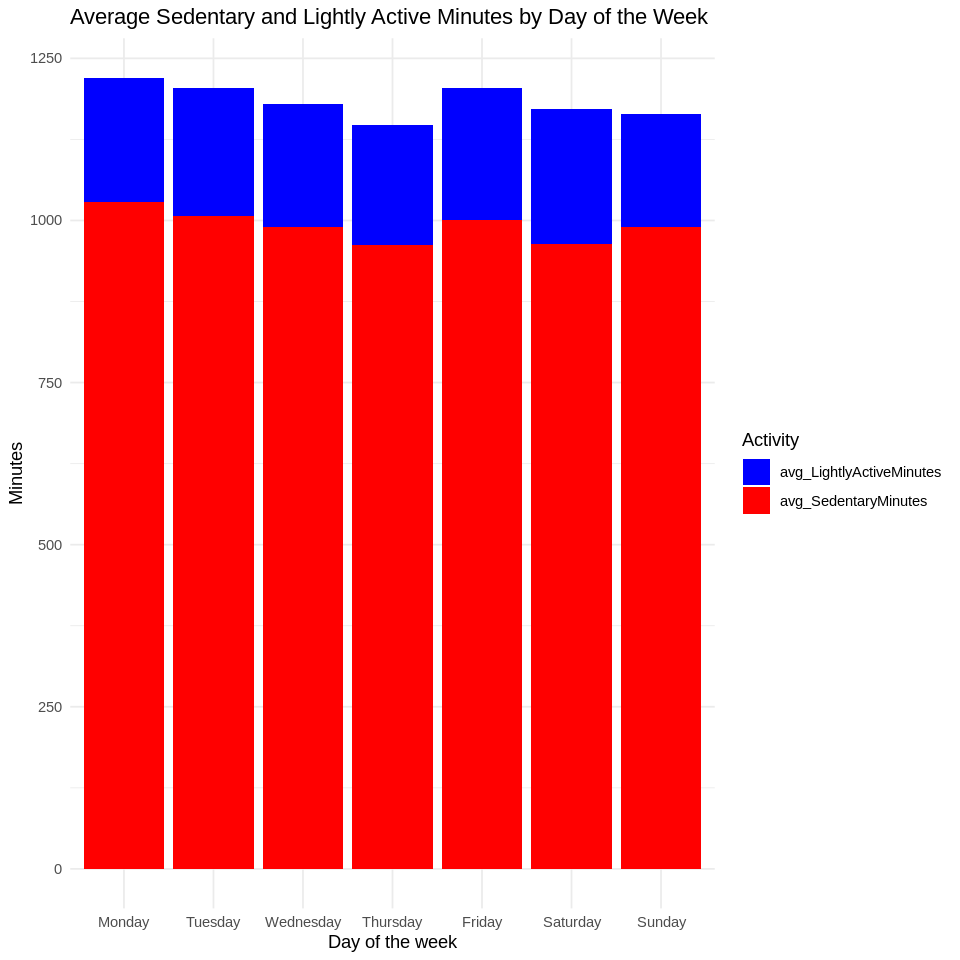

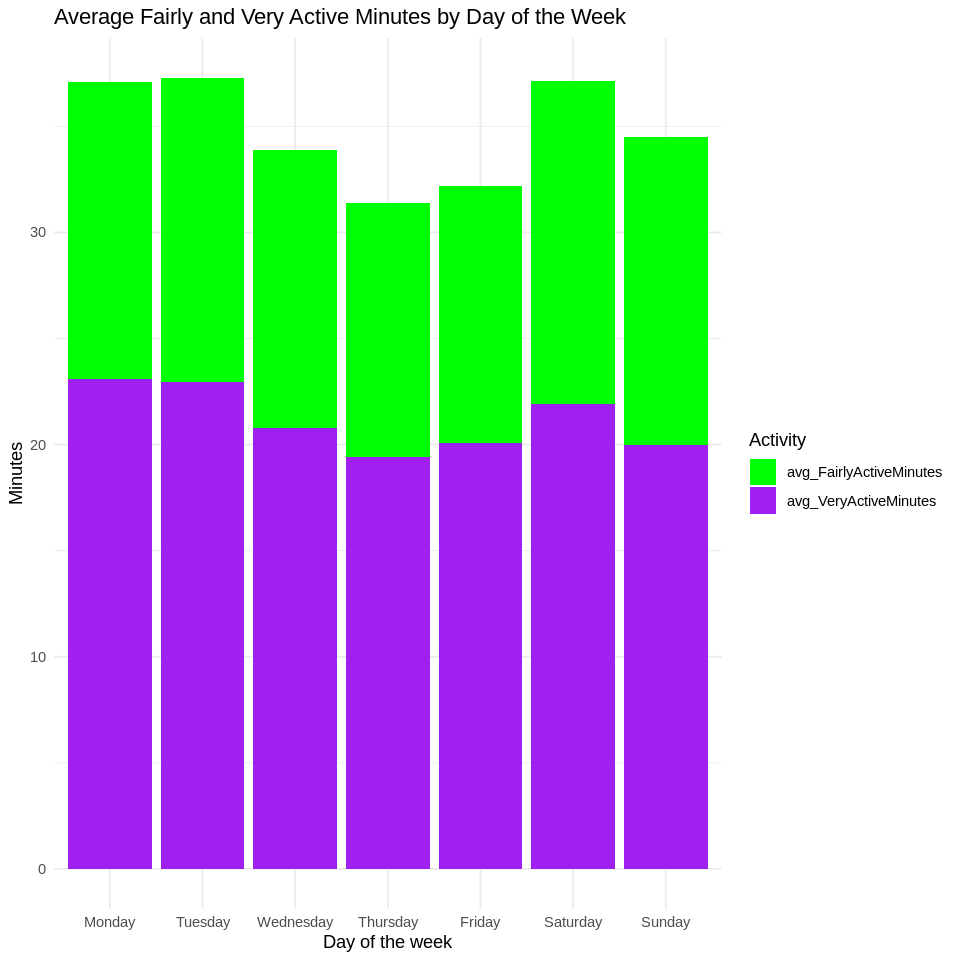

In [57]:
library(dplyr)
library(ggplot2)

# Create two dataframes so we can stack the variables
sedentary_lightly_active <- summary_intensities_by_day %>%
  select(DayOfWeek, avg_SedentaryMinutes, avg_LightlyActiveMinutes) %>%
  pivot_longer(-DayOfWeek, names_to = "Activity", values_to = "Minutes")

fairly_very_active <- summary_intensities_by_day %>%
  select(DayOfWeek, avg_FairlyActiveMinutes, avg_VeryActiveMinutes) %>%
  pivot_longer(-DayOfWeek, names_to = "Activity", values_to = "Minutes")

# Create stack bar plot for Sedentary and Lightly Active variables
ggplot(sedentary_lightly_active, aes(x = DayOfWeek, y = Minutes, fill = Activity)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Average Sedentary and Lightly Active Minutes by Day of the Week",
       x = "Day of the week",
       y = "Minutes",
       fill = "Activity") +
  scale_fill_manual(values = c("avg_SedentaryMinutes" = "red", "avg_LightlyActiveMinutes" = "blue")) +
  theme_minimal()

# Create stack bar plot for Fairly Active and Very Active variables
ggplot(fairly_very_active, aes(x = DayOfWeek, y = Minutes, fill = Activity)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Average Fairly and Very Active Minutes by Day of the Week",
       x = "Day of the week",
       y = "Minutes",
       fill = "Activity") +
  scale_fill_manual(values = c("avg_FairlyActiveMinutes" = "green", "avg_VeryActiveMinutes" = "purple")) +
  theme_minimal()

## daily_sleep

In [58]:
# Create new variable for the day of the week
daily_sleep <- daily_sleep %>%
  mutate(DayOfWeek = weekdays(Date))

# Group by day of the week and calculate mean
summary_sleep_by_day <- daily_sleep %>%
  group_by(DayOfWeek) %>%
  summarize(avg_TotalSleepRecords = mean(TotalSleepRecords),
            avg_TotalMinutesAsleep = mean(TotalMinutesAsleep),
            avg_TotalTimeInBed = mean(TotalTimeInBed))


# Reorder DayOfWeek variable to give the vizz the order we want
summary_sleep_by_day$DayOfWeek <- factor(summary_sleep_by_day$DayOfWeek,
                                   levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

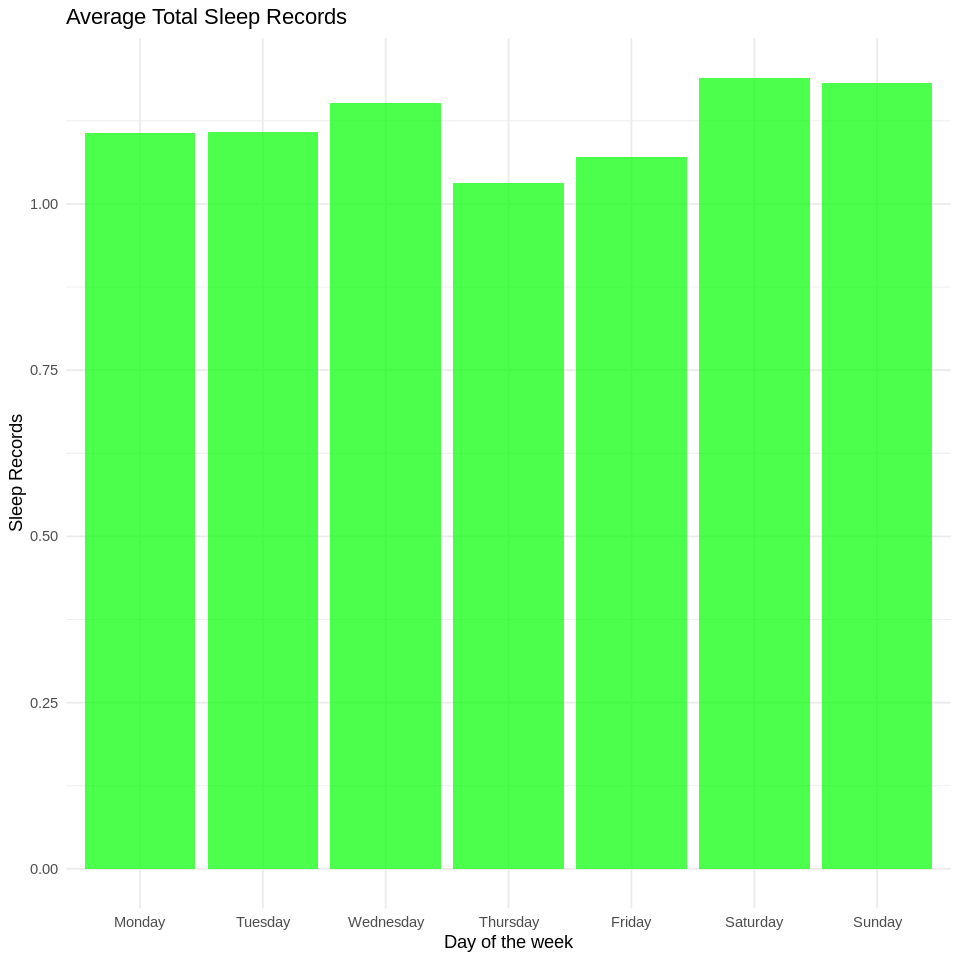

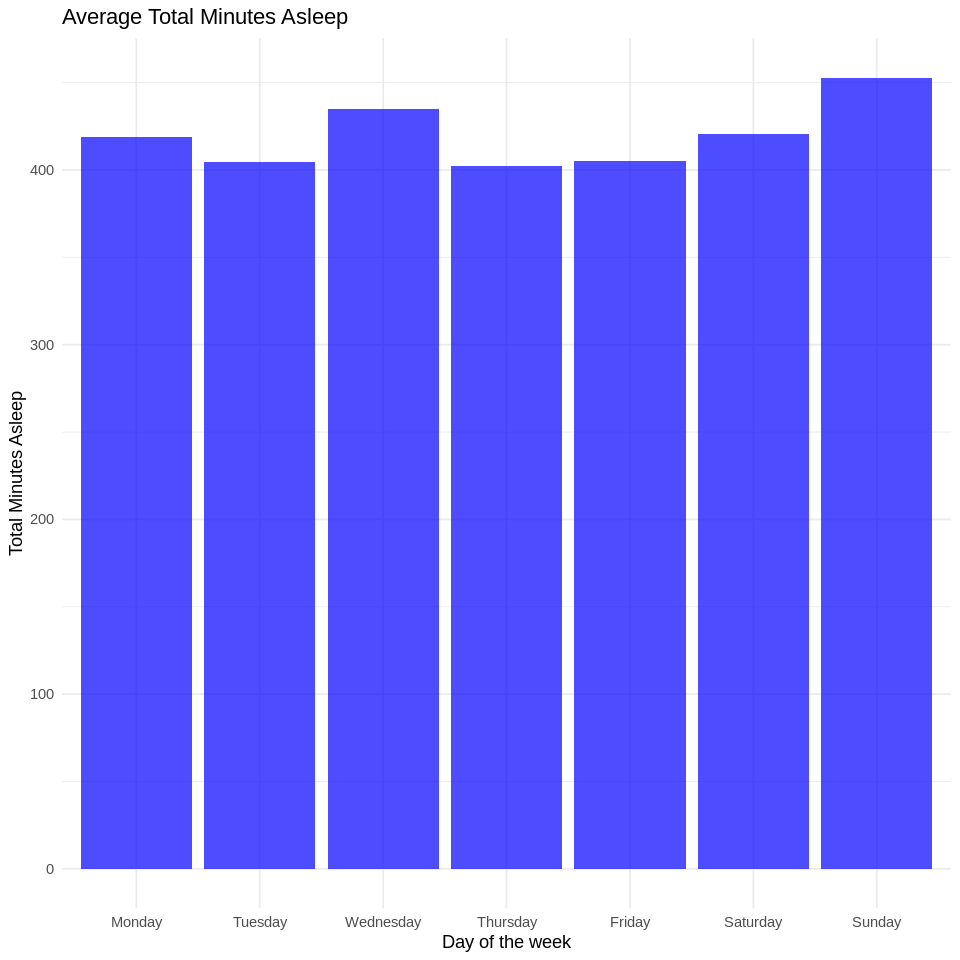

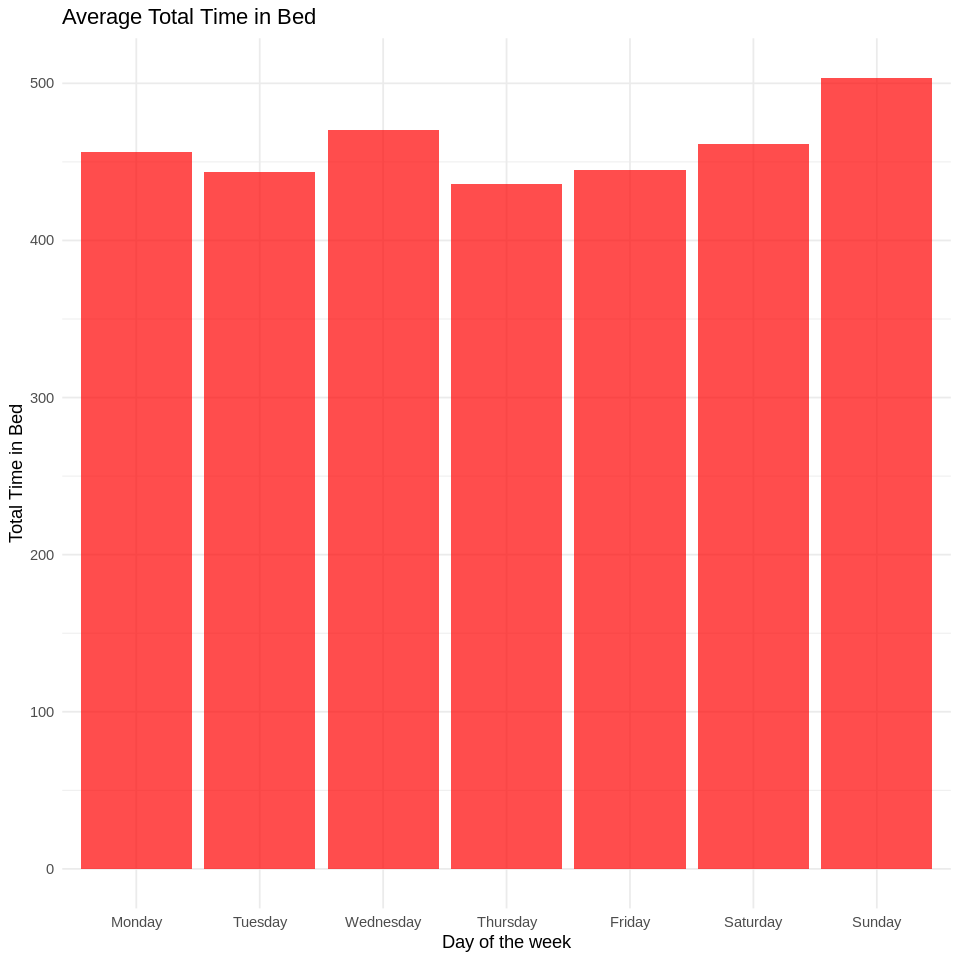

In [59]:
# Total Sleep Records visualization
ggplot(summary_sleep_by_day, aes(x = DayOfWeek, y = avg_TotalSleepRecords)) +
  geom_bar(stat = "identity", fill = "green", alpha = 0.7) +
  labs(title = "Average Total Sleep Records",
       x = "Day of the week",
       y = "Sleep Records") +
  theme_minimal()

# Total Minutes Asleep visualization
ggplot(summary_sleep_by_day, aes(x = DayOfWeek, y = avg_TotalMinutesAsleep)) +
  geom_bar(stat = "identity", fill = "blue", alpha = 0.7) +
  labs(title = "Average Total Minutes Asleep",
       x = "Day of the week",
       y = "Total Minutes Asleep") +
  theme_minimal()

# Total Time in Bed visualization
ggplot(summary_sleep_by_day, aes(x = DayOfWeek, y = avg_TotalTimeInBed)) +
  geom_bar(stat = "identity", fill = "red", alpha = 0.7) +
  labs(title = "Average Total Time in Bed",
       x = "Day of the week",
       y = "Total Time in Bed") +
  theme_minimal()

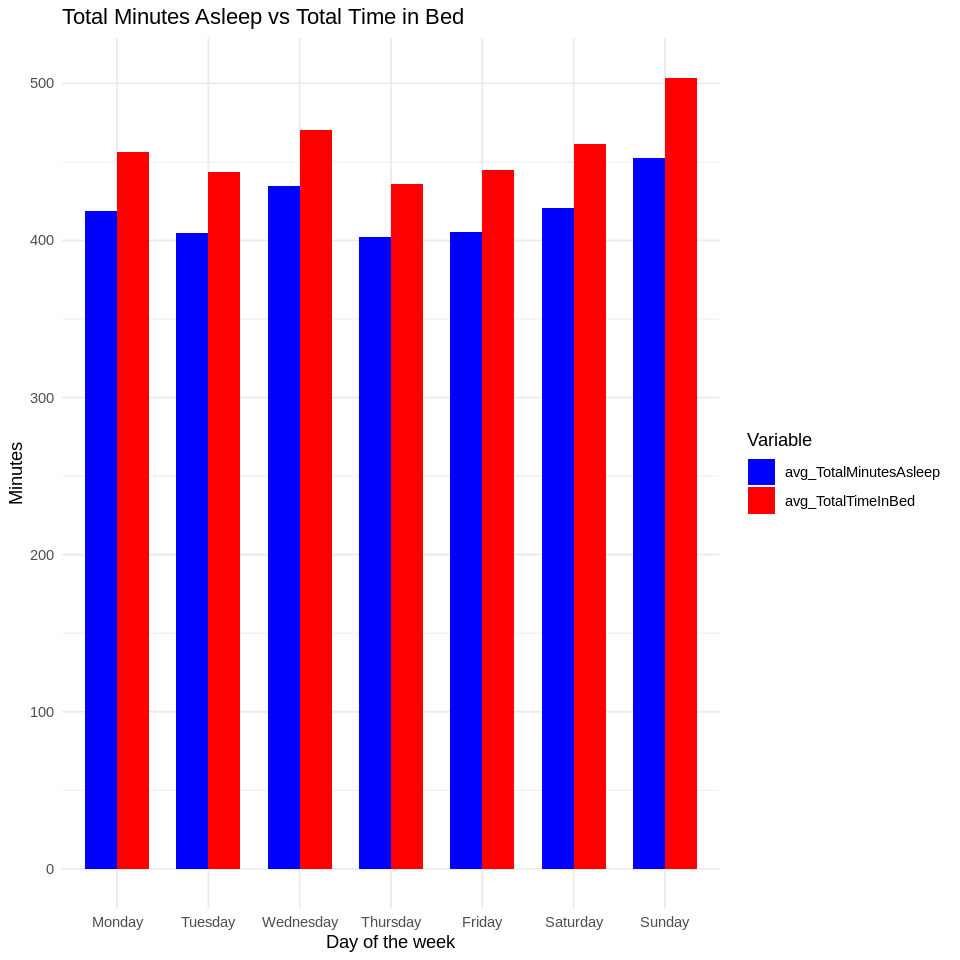

In [60]:
library(ggplot2)
library(dplyr)

# Create new variable for the day of the week
daily_sleep <- daily_sleep %>%
  mutate(DayOfWeek = weekdays(Date))

# Group by day of the week and calculate mean
summary_sleep_by_day <- daily_sleep %>%
  group_by(DayOfWeek) %>%
  summarize(avg_TotalMinutesAsleep = mean(TotalMinutesAsleep),
            avg_TotalTimeInBed = mean(TotalTimeInBed))

# Reorder DayOfWeek variable to give the visualization the order we want
summary_sleep_by_day$DayOfWeek <- factor(summary_sleep_by_day$DayOfWeek,
                                           levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

# Reshape data for grouped bar plot
summary_sleep_by_day_long <- summary_sleep_by_day %>%
  pivot_longer(cols = c(avg_TotalMinutesAsleep, avg_TotalTimeInBed),
               names_to = "Variable", values_to = "Minutes")

ggplot(summary_sleep_by_day_long, aes(x = DayOfWeek, y = Minutes, fill = Variable)) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  labs(title = "Total Minutes Asleep vs Total Time in Bed",
       x = "Day of the week",
       y = "Minutes") +
  scale_fill_manual(values = c("avg_TotalMinutesAsleep" = "blue", "avg_TotalTimeInBed" = "red")) +
  theme_minimal()


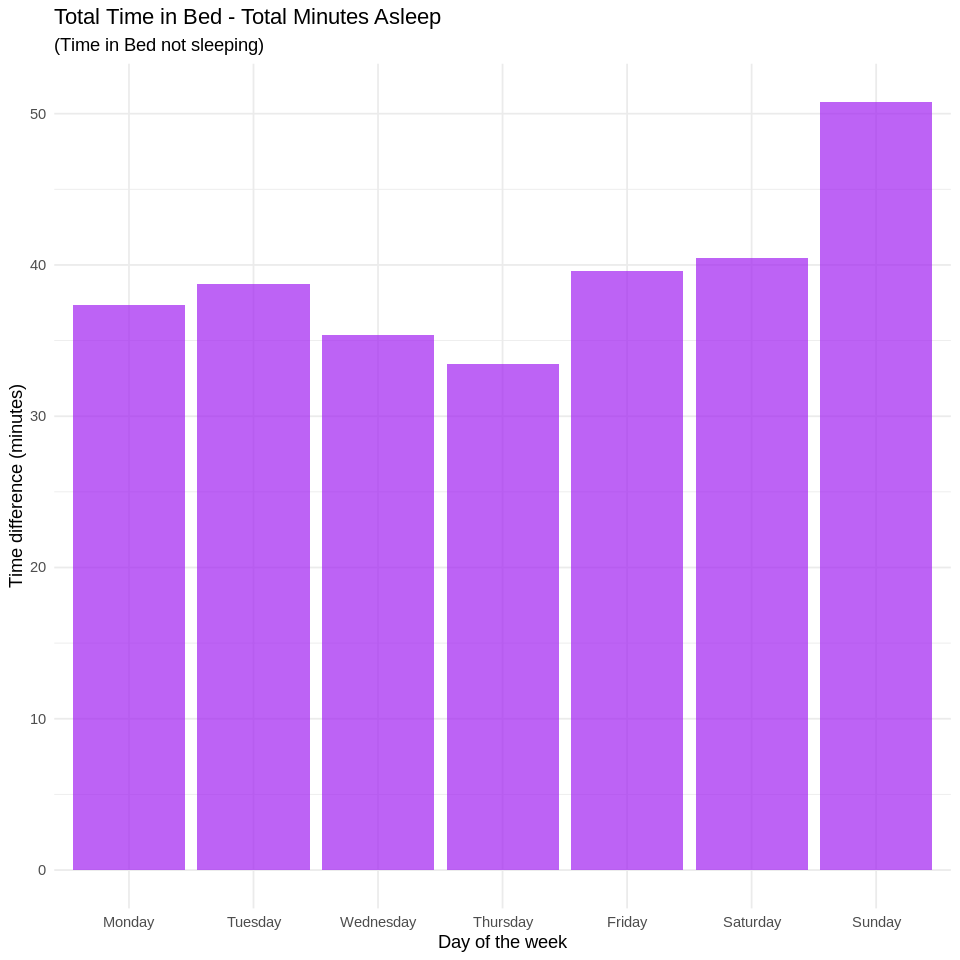

In [61]:
# Calculate difference between Total Time in Bed and Total Minutes Asleep
summary_sleep_by_day <- summary_sleep_by_day %>%
  mutate(TimeInBed_Minus_MinutesAsleep = avg_TotalTimeInBed - avg_TotalMinutesAsleep)

# Plot difference
ggplot(summary_sleep_by_day, aes(x = DayOfWeek, y = TimeInBed_Minus_MinutesAsleep)) +
  geom_bar(stat = "identity", fill = "purple", alpha = 0.7) +
  labs(title = "Total Time in Bed - Total Minutes Asleep",subtitle = "(Time in Bed not sleeping)",
       x = "Day of the week",
       y = "Time difference (minutes)") +
  theme_minimal()

## daily_MET

In [62]:
# Convert time_met_record to a time format
daily_MET$time_met_record <- as.POSIXct(daily_MET$time_met_record, format = "%H:%M:%S")

# Add hour column
daily_MET$hour <- format(daily_MET$time_met_record, format = "%H")

# Calculate mean of MET every hour
hourly_MET <- daily_MET %>%
  group_by(hour) %>%
  summarise(mean_MET = mean(METs))

# Create an array with every hour of the day
hours_of_day <- sprintf("%02d", 0:23)

# Create new data frame for every hour
hourly_MET_all_hours <- data.frame(hour = hours_of_day)

# Merge data
hourly_MET_all_hours <- merge(hourly_MET_all_hours, hourly_MET, by = "hour", all.x = TRUE)

print(hourly_MET_all_hours)

   hour mean_MET
1    00 10.84536
2    01 10.56022
3    02 10.40400
4    03 10.16942
5    04 10.24878
6    05 11.87237
7    06 12.94413
8    07 14.29216
9    08 15.56393
10   09 16.16957
11   10 16.84808
12   11 16.61268
13   12 17.59376
14   13 17.38807
15   14 17.44007
16   15 16.05749
17   16 17.14280
18   17 18.55142
19   18 18.68469
20   19 18.28100
21   20 15.50710
22   21 14.54120
23   22 13.41849
24   23 11.87752


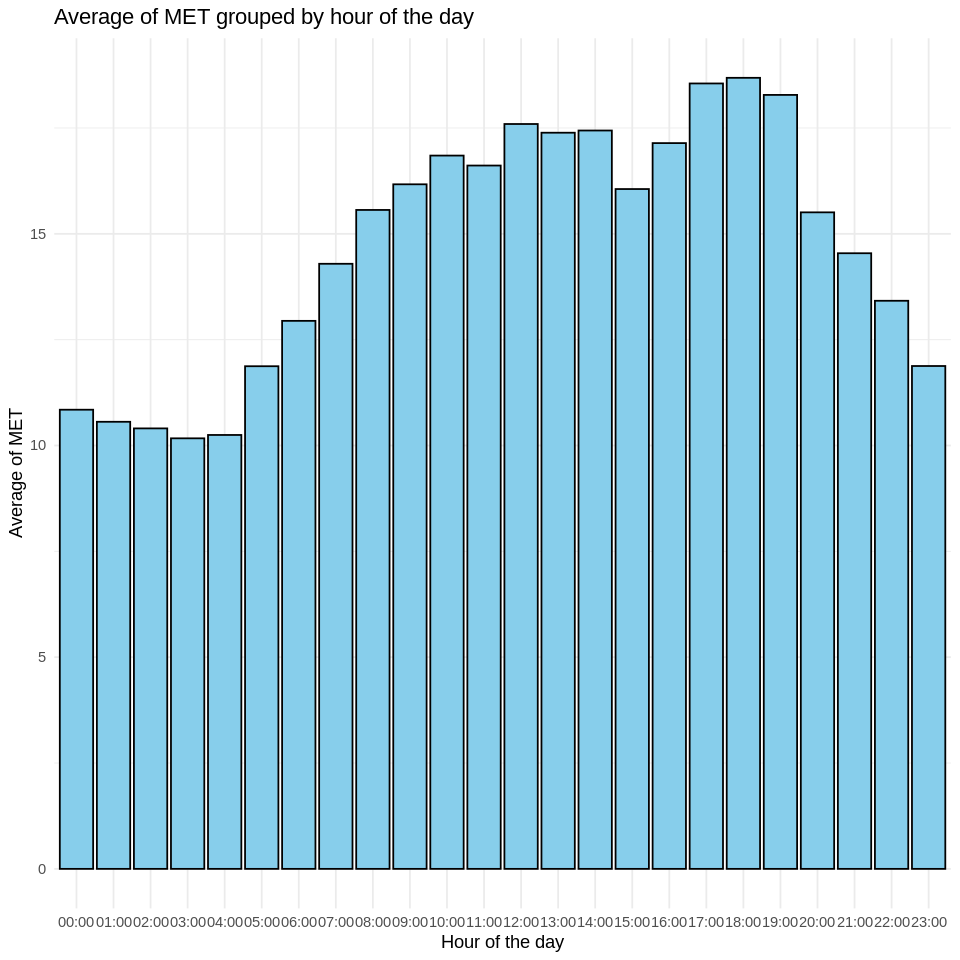

In [63]:
ggplot(hourly_MET_all_hours, aes(x = hour, y = mean_MET)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Average of MET grouped by hour of the day",
       x = "Hour of the day",
       y = "Average of MET") +
  scale_x_discrete(labels = function(x) paste0(x, ":00")) +
  theme_minimal()


## daily_body_metrics

In [64]:
avg_sleep_time <- daily_sleep %>%
  group_by(User) %>%
  summarize(avg_sleep = mean(TotalMinutesAsleep))

avg_time_in_bed <- daily_sleep %>%
  group_by(User) %>%
  summarize(avg_time_in_bed = mean(TotalTimeInBed))

# Create new table with join
avg_sleep_bed <- inner_join(avg_sleep_time, avg_time_in_bed, by = "User")

# Calculate mean time in bed without sleeping
avg_sleep_bed$avg_time_awake_in_bed <- avg_sleep_bed$avg_time_in_bed - avg_sleep_bed$avg_sleep

# Now we join the BMI variable to users from daily_body_metrics
final_table <- inner_join(avg_sleep_bed, daily_body_metrics[, c("User", "BMI")], by = "User")

# Our new table
print(final_table)

# A tibble: 41 × 5
         User avg_sleep avg_time_in_bed avg_time_awake_in_bed   BMI
        <dbl>     <dbl>           <dbl>                 <dbl> <dbl>
 1 1503960366      360.            383.                  22.9  22.6
 2 1503960366      360.            383.                  22.9  22.6
 3 1927972279      417             438.                  20.8  47.5
 4 4319703577      477.            502.                  25.3  27.5
 5 4319703577      477.            502.                  25.3  27.4
 6 4558609924      128.            140                   12.4  27.2
 7 4558609924      128.            140                   12.4  27.5
 8 4558609924      128.            140                   12.4  27.3
 9 4558609924      128.            140                   12.4  27.0
10 4558609924      128.            140                   12.4  27  
# ℹ 31 more rows


[1] "Correlation Coeficient: 0.0771096432265008"


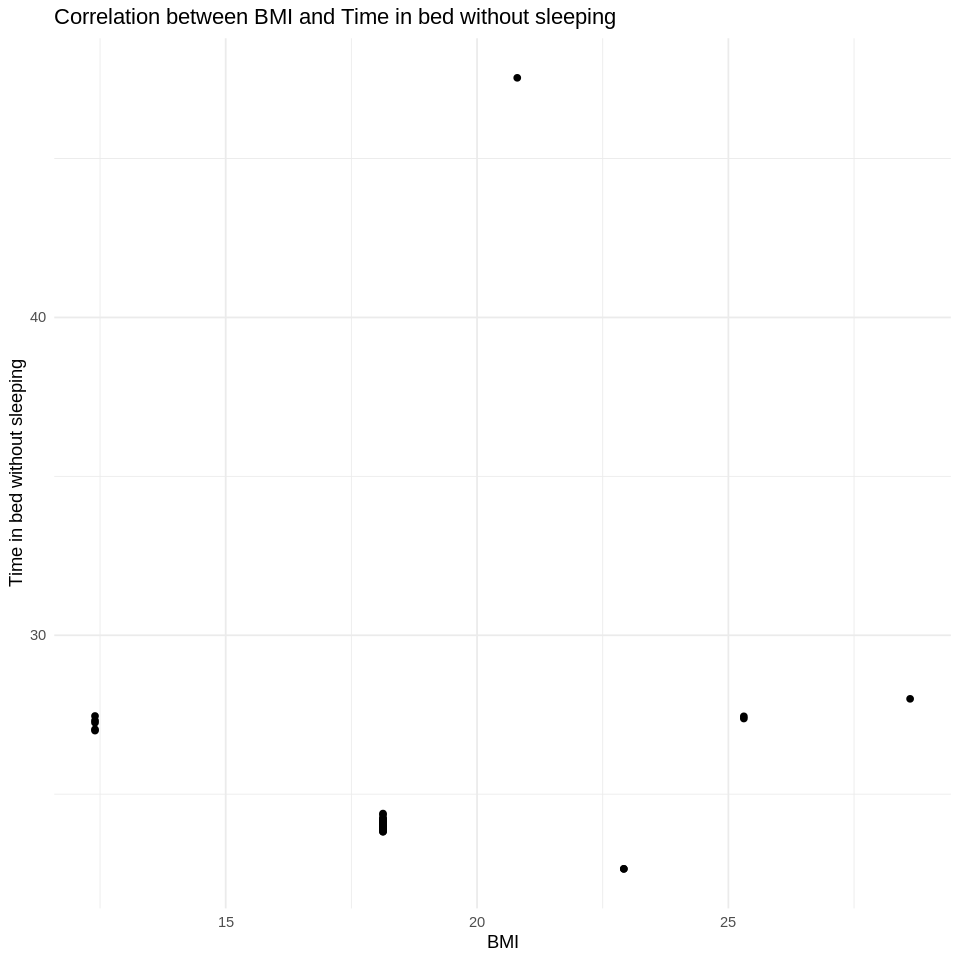

In [65]:
ggplot(final_table, aes(x = avg_time_awake_in_bed, y = BMI)) +
  geom_point() +
  labs(x = "BMI", y = "Time in bed without sleeping") +
  ggtitle("Correlation between BMI and Time in bed without sleeping") +
  theme_minimal()

# Calculate the correlation coeficient
correlation <- cor(final_table$BMI, final_table$avg_time_awake_in_bed)
print(paste("Correlation Coeficient:", correlation))


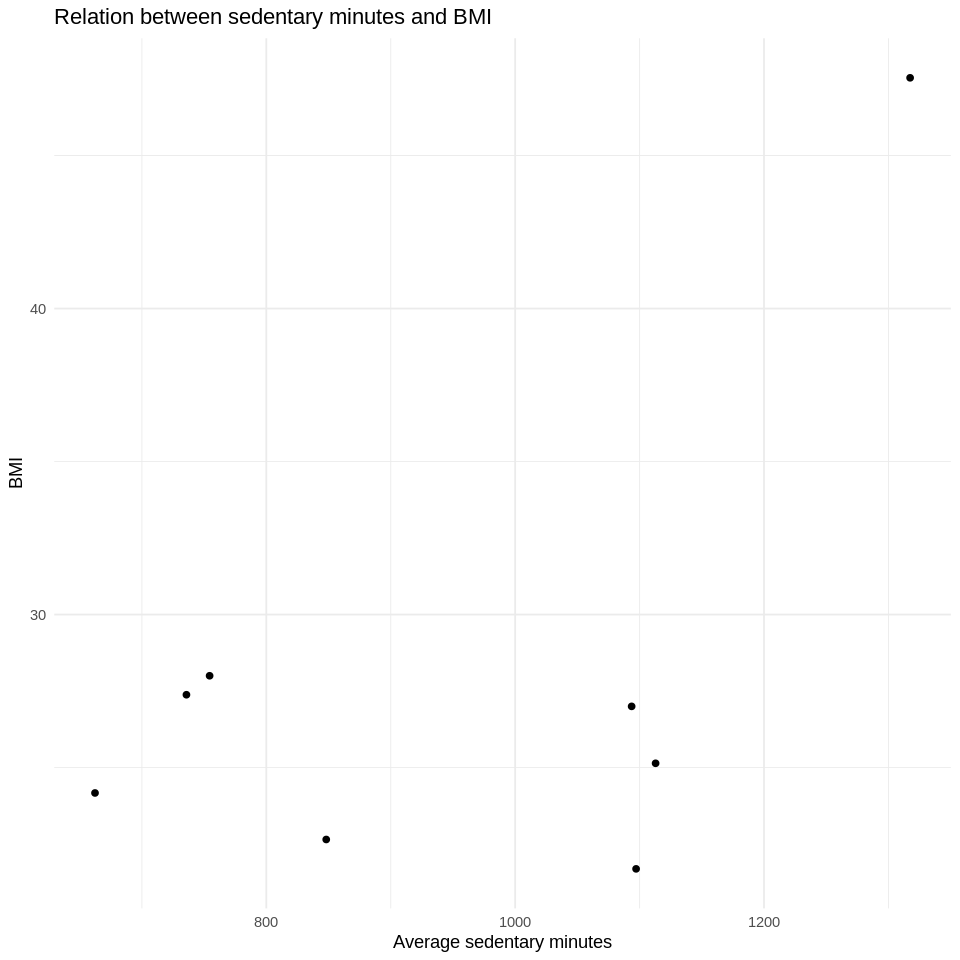

In [66]:
avg_sedentary_minutes <- daily_intesities %>%
  group_by(User) %>%
  summarize(avg_sedentary_minutes = mean(SedentaryMinutes))

# We are going to use the last BMI record for each user, since we have multiple
latest_bmi <- daily_body_metrics %>%
  group_by(User) %>%
  slice_max(Date) %>%
  select(User, BMI)

merged_data <- inner_join(avg_sedentary_minutes, latest_bmi, by = "User")

ggplot(merged_data, aes(x = avg_sedentary_minutes, y = BMI)) +
  geom_point() +
  labs(title = "Relation between sedentary minutes and BMI",
       x = "Average sedentary minutes",
       y = "BMI") +
  theme_minimal()


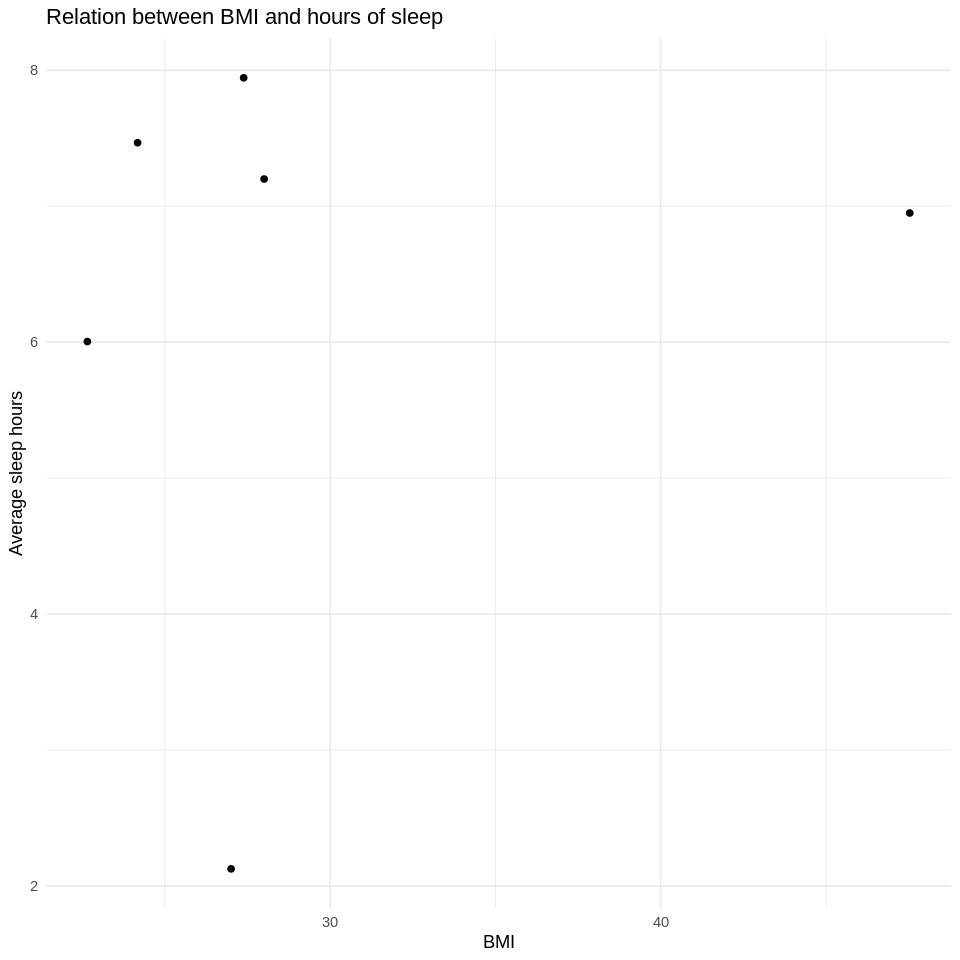

In [67]:
# We are going to use the last BMI record for each user, since we have multiple
latest_bmi <- daily_body_metrics %>%
  group_by(User) %>%
  slice_max(Date) %>%
  select(User, BMI)

# Calculate te average sleep hours for each User
avg_sleep_minutes <- daily_sleep %>%
  group_by(User) %>%
  summarize(avg_sleep_minutes = mean(TotalMinutesAsleep / 60))  # Convert to hours

merged_data_sleep <- inner_join(latest_bmi, avg_sleep_minutes, by = "User")

ggplot(merged_data_sleep, aes(x = BMI, y = avg_sleep_minutes)) +
  geom_point() +
  labs(title = "Relation between BMI and hours of sleep",
       x = "BMI",
       y = "Average sleep hours") +
  theme_minimal()


## Act

#### It's evident that the dataset's size considerably restricted the depth of exploration. However, this serves as an invaluable starting point for more comprehensive analyses leveraging richer datasets.

<br>

* **Sleep Patterns During the Week:**

The observation of increased non-sleeping bed hours during weekends, especially on Sundays, hints at a relaxation of sleep routines during leisure days.


* **Physical Activity Across the Week:**

The weekdays, specifically Mondays, Tuesdays, and Saturdays, demonstrate heightened activity levels, contrasting with the more sedentary Thursdays and Sundays.

* **Peak Hours of Activity:**

The peak activity hours from 5 pm to 7 pm likely coincide with post-work leisure or exercise routines, reflecting users' daily rhythms.

* **MET Peaks and Daily Rhythms:**

The gradual rise in activity from 5 am, peaking at 6 pm, followed by a decline until bedtime, illustrates a consistent daily routine among users.

* **BMI Relationship with Sleep and Physical Activity:**

Despite thorough analysis, establishing robust correlations between BMI and sleep/activity behaviors proved elusive, primarily due to dataset constraints and the multifaceted nature of lifestyle interactions.

<br>


#### In conclusion, while this analysis offers valuable insights, the constrained dataset size underscores the need for expanded data collection efforts. As a junior data analyst, acknowledging these limitations and expressing enthusiasm for future endeavors to secure richer datasets demonstrates a commitment to professional growth and data-driven decision-making. This preliminary analysis sets the stage for more nuanced investigations, positioning you as a proactive contributor to the organization's analytical pursuits.